In [62]:
# переведем разметку в датафрейм
import json
import pandas
import re


with open('mystem_tags.json', encoding='utf-8') as f:
    mystem_tags = json.loads(f.read())


def data_frame_entry(word):
    entry = {'lex': word['analysis'][0]['lex'], 'word': word['text'].lower()}
    tags = word['analysis'][0]['gr'].split(',')
    for tag in tags:
        tag = re.findall('[\w-]+', tag)
        for subtag in tag:
            if subtag in mystem_tags:
                if mystem_tags[subtag] not in entry:
                    entry[mystem_tags[subtag]] = subtag 
    return entry
    

with open('mystem_analysis.json', encoding='utf-8') as f:
    mystem_analysis = json.loads(f.read())

df = []
for word in mystem_analysis:
    if 'analysis' in word and word['analysis']:
        df.append(data_frame_entry(word))
        
df = pandas.DataFrame(df).fillna('')
df.to_csv('pushkin.csv', sep='\t', index=False)

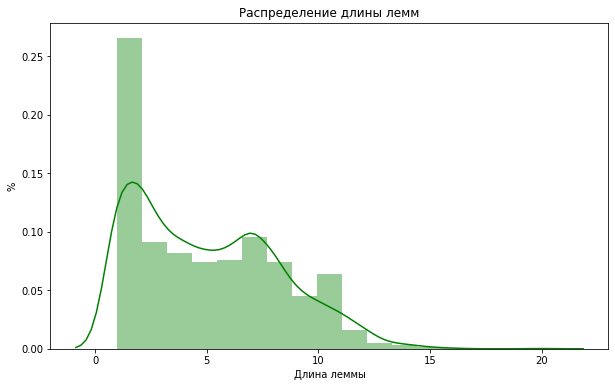

In [63]:
# повторим графики из семинара
import matplotlib.pyplot as plt
import seaborn as sns


pushkin = pandas.read_csv('pushkin.csv', sep='\t').fillna('')
pushkin['length'] = pushkin['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(pushkin['length'], bins=17, color='green')
plt.title('Распределение длины лемм')
plt.ylabel('%')
plt.xlabel('Длина леммы');

Text(0, 0.5, 'количество вхождений')

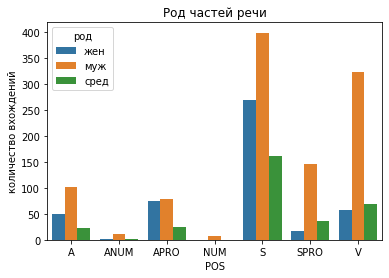

In [64]:
pushkin2 = pushkin[
    (pushkin['род'] != '') & (pushkin['род'] != 'мж')
][
    ['POS', 'род', 'число']
].groupby(['POS', 'род'], as_index=False).count()
pushkin2.columns = ['POS', 'род', 'total']
sns.barplot(x="POS", y="total", hue='род', data=pushkin2)
plt.title('Род частей речи')
plt.xlabel('POS')
plt.ylabel('количество вхождений')

Text(0.5, 0, 'POS')

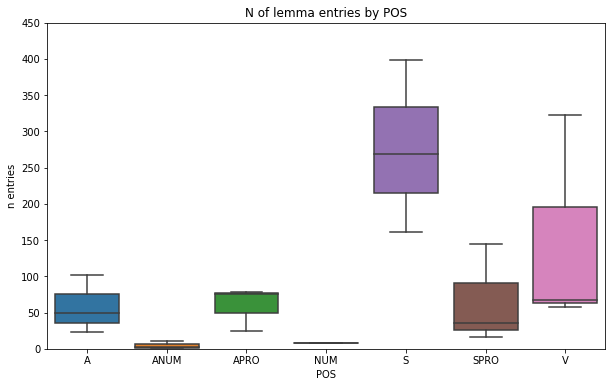

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="POS", y="total", data=pushkin2)
plt.ylim((0, 450))
plt.title('N of lemma entries by POS')
plt.ylabel('n entries')
plt.xlabel('POS')

Text(0.5, 1.0, 'Лицо глаголов')

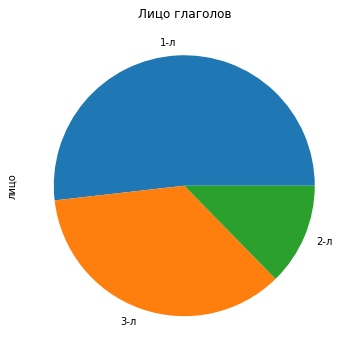

In [66]:
# придумаем 2 своих визуализации
# Узнаем распределение по лицам личных форм глаголов в тексте.
# Для этого разумно использовать pie chart, так как принимаемых значений всего три (три лица), а нам нужно лишь 
# визуально оценить общее распределение глагольных форм. Цветами обозначены лица, а размер секторов отвечает за
# количество форм глаголов соответствующих лиц в тексте.
pushkin_person = pushkin[
    (pushkin['лицо'] != '')
]
plt.figure(figsize=(6, 6))
pushkin_person['лицо'].value_counts().plot(kind='pie')
plt.title('Лицо глаголов')

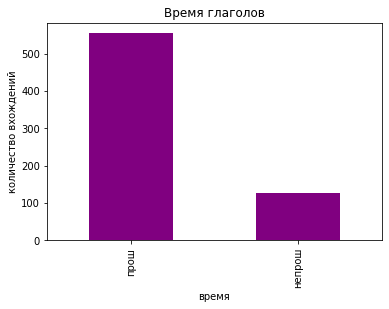

In [67]:
# Узнаем, как распределяются финитные формы глаголов в тексте по временам. Для этого подойдет bar chart: принимаемых
# значений всего два (прошедшее и непрошедшее время), а bar chart позволит визуально оценить их отношение.
# Два столбика отвечают за прошедшее и непрошедшее время, а по вертикали отложено количество вхождений. Высота столбиков
# отражает количество форм глаголов в соответствующих формах (прошедшее и непрошедшее время).
pushkin_tense = pushkin[
    (pushkin['время'] != '')
]
pushkin_tense['время'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Время глаголов')
plt.xlabel('время')
plt.ylabel('количество вхождений')

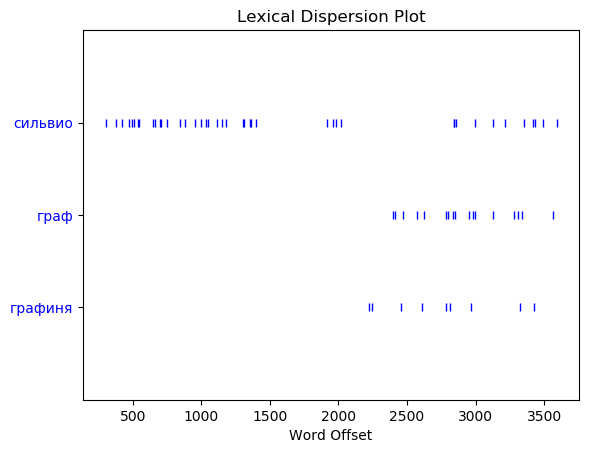

In [77]:
# построим dispersion plot
from nltk.draw.dispersion import dispersion_plot


with open('pymorphy_analysis.json', encoding='utf-8') as f:
    pushkin = json.loads(f.read())
    pushkin = [x['lemma'] for x in pushkin]

dispersion_plot(pushkin, ['сильвио', 'граф', 'графиня'])